In [58]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import umap

import random
random.seed(0)

In [33]:
n_clusters = 5

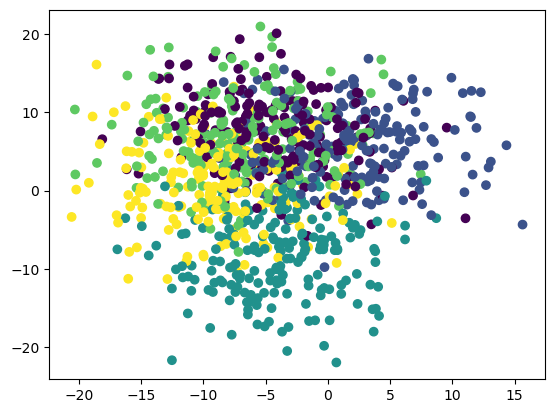

In [107]:
#generate the data
x, y = make_blobs(n_samples=1000, centers=n_clusters, n_features=10, cluster_std=5)
#plot first 2 components
plt.scatter(x[:,0],x[:,1], c=y)

Text(0.5, 1.0, 'UMAP Embeddings')

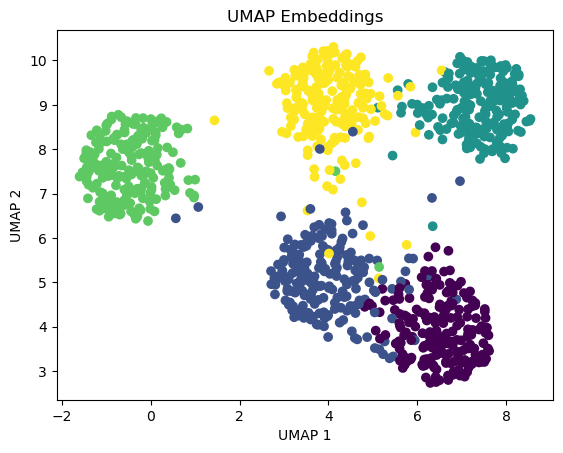

In [192]:
reducer = umap.UMAP(n_neighbors=50, min_dist=0.3, n_components=2, metric='euclidean', random_state=0)
embedding=reducer.fit_transform(x)

#plot first UMAP embeddings
plt.scatter(embedding[:,0],embedding[:,1], c=y)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Embeddings')

Text(0.5, 1.0, 'UMAP Embeddings')

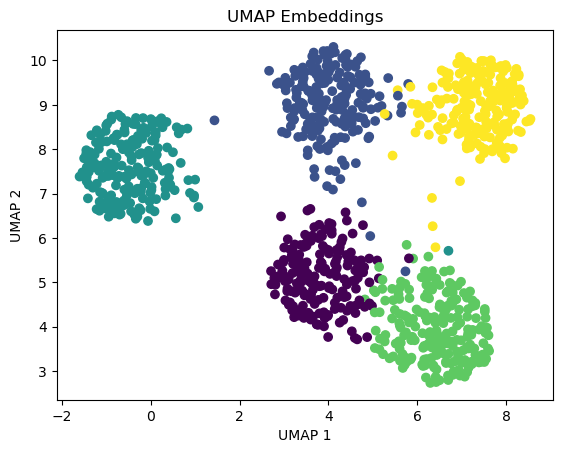

In [109]:
#apply kmeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y_pred = kmeans.labels_

#plot results
plt.scatter(embedding[:,0],embedding[:,1], c=y_pred)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Embeddings')

In [111]:
#calculate decision boundary mesh
def decision_mesh(embedding, kmeans, umap_reducer, step=0.05):
    
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = embedding[:, 0].min() - 1, embedding[:, 0].max() + 1
    y_min, y_max = embedding[:, 1].min() - 1, embedding[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    # Obtain labels for each point in mesh. Use last trained model.
    plot_points = umap_reducer.inverse_transform(np.c_[xx.ravel(), yy.ravel()]) #from 2d to original space
    Z = kmeans.predict(plot_points.astype(float)) #kmeans classifier
    
    return Z, xx, yy

In [211]:
def plot_mesh(Z, xx, n_clusters, ax, color_list=None):
    if color_list==None:
        colormap = ListedColormap( [plt.cm.Set3(i) for i in range(n_clusters)] ) #sns.color_palette("husl", 8)
    else:
        colormap = ListedColormap(color_list)
        
    plt.sca(ax)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=colormap,
        aspect="auto",
        origin="lower",
    )

    cbar = plt.colorbar(ticks=np.arange(0,n_clusters,1))
    cbar.ax.set_ylabel('K-means Cluster', rotation=270)
    
    cbar.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate([str(i) for i in range(n_clusters)]):
        cbar.ax.text(.5, (4 * j + 1) / 5, lab, ha='center', va='center')
    cbar.ax.get_yaxis().labelpad = 15

    return ax, cbar

In [190]:
kmeans.cluster_centers_

array([[ 2.48466795,  5.77477417,  6.25794647, -7.16260869,  5.9580601 ,
        -9.56267913,  2.3821518 ,  1.32047634,  7.16002169, -1.33286903],
       [-8.43628258,  1.1069303 ,  9.45587909,  2.39884878, -4.81950622,
        -4.7102086 ,  5.43860434,  3.93484399, -1.92859171, -7.97736714],
       [-6.821677  ,  6.69447703, -5.31878555,  0.07770361,  0.1758111 ,
         8.50873771,  9.75604676,  6.90524216,  1.67468411,  3.1924694 ],
       [-4.40267818,  7.67257939, -3.5500698 , -7.46584063,  1.14376357,
        -6.96818038, -8.1283172 ,  2.23303777,  3.54179795, -3.89949649],
       [-4.13899525, -8.11101456, -4.06896675,  8.10248043,  7.42153208,
        -7.53126091,  3.19918712,  4.21522861, -3.38456789, -3.85064646]])

In [113]:
Z, xx, yy = decision_mesh(embedding, kmeans, reducer, step=0.05)

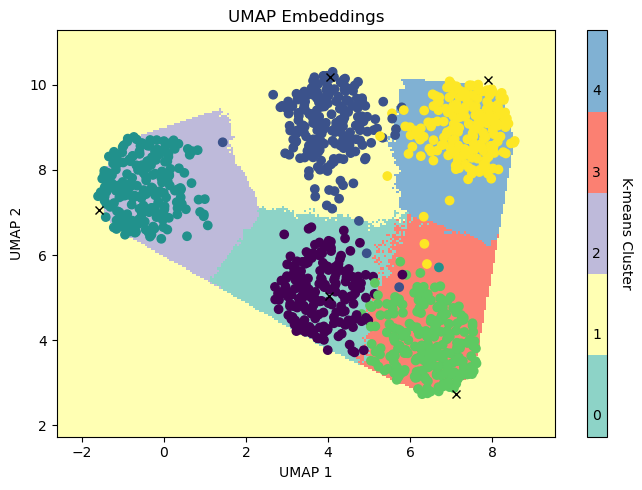

In [199]:
fig, ax = plt.subplots(figsize=(7,5))
ax = plot_mesh(Z, xx, n_clusters, ax)

#plot first UMAP embeddings
plt.sca(ax)
plt.scatter(embedding[:,0],embedding[:,1], c=y_pred)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Embeddings')

#centroids
centroids = kmeans.cluster_centers_
centroids2 = reducer.transform(centroids)
for i, center in enumerate(centroids2):
    plt.plot(center[0], center[1], 'kx')
plt.tight_layout()

Text(0.5, 1.0, 'UMAP Embeddings')

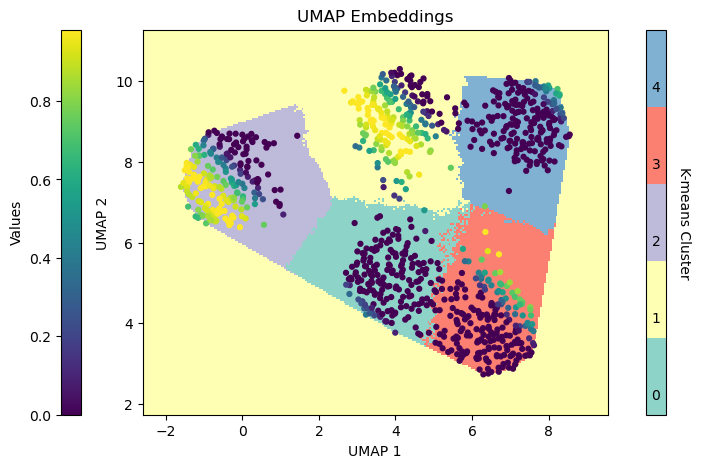

In [219]:
#create additional variable
z = np.cos(embedding[:,0]+embedding[:,1])
z = z/z.max()

fig, ax = plt.subplots(figsize=(10,5))
ax, cbar = plot_mesh(Z, xx, n_clusters, ax)

#plot values
plt.sca(ax)
max_value=np.percentile(z,95)
cmap = sns.color_palette('viridis',as_cmap=True)
points = plt.scatter(embedding[:,0],embedding[:,1], s=12, c=z, cmap=cmap, vmin=0, vmax=max_value)
plt.colorbar(points, location='left', label='Values')

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Embeddings')